# diabetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
data.tail()

,6,148,72,35,0,33.6,0.627,50,1
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
6        767 non-null int64
148      767 non-null int64
72       767 non-null int64
35       767 non-null int64
0        767 non-null int64
33.6     767 non-null float64
0.627    767 non-null float64
50       767 non-null int64
1        767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [6]:
data.corr()

,6,148,72,35,0,33.6,0.627,50,1
6,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
148,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
72,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
35,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
0,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
33.6,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
0.627,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
50,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
1,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


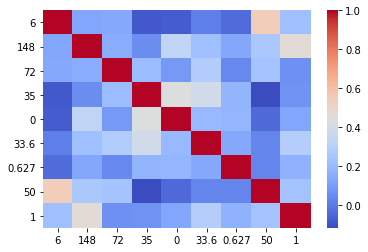

In [7]:
sns.heatmap(data=data.corr(),cmap="coolwarm")

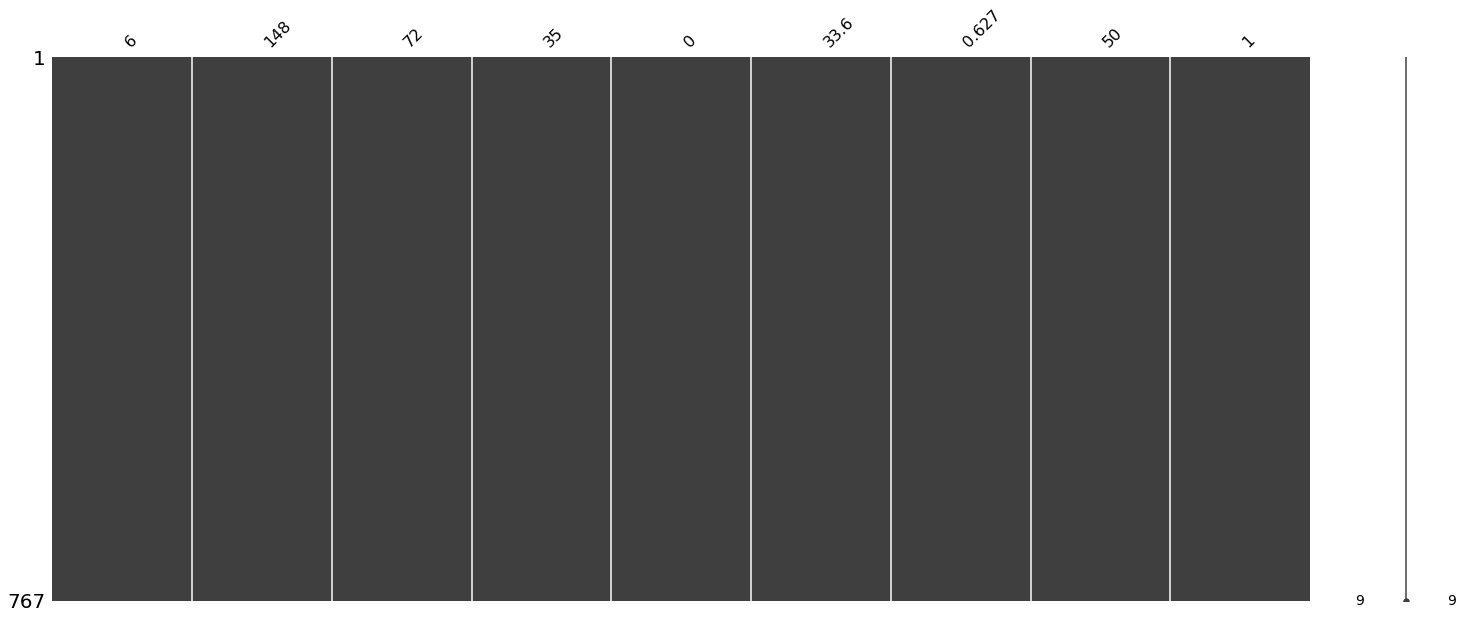

In [8]:
ms.matrix(data)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test=train_test_split(data.drop("1",axis=1),data["1"],test_size=0.20,random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [11]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
predictions=model.predict(X_test)

In [13]:
from sklearn.metrics import precision_score

In [14]:
print(precision_score(Y_test,predictions))

0.745454545455


## 2nd iteration

In [15]:
from sklearn.linear_model import LogisticRegression


# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
predicts=logmodel.predict(X_test)

In [17]:
from sklearn.metrics import precision_score
print(precision_score(Y_test,predicts))

0.826086956522
